In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [188]:
x_train_file = open("x_train.csv")
x_train = []
for idx, i in enumerate(x_train_file):
    if idx == 0:
        continue
    x = i.strip().split(",")
    x_train.append(x[1])

y_train_file = open("y_train.csv")
y_train = []
for idx, i in enumerate(y_train_file):
    if idx == 0:
        continue
    y_train.append(i)

y_train = np.asarray(y_train,dtype=int).reshape(len(y_train),1)


vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
corpus_size = x_train.shape[1]
x_train = x_train.toarray()


x_val, y_val = None, None 
print(y_train.shape) #Samples x 1
print(x_train.shape) #Samples x Feature Size
print(f'corpus size {corpus_size}')

(2400, 1)
(2400, 3630)
corpus size 3630


In [ ]:
indices = np.random.permutation(x_train.shape[0])
training_idx, test_idx = indices[:2000], indices[2000:] #16% Validation, 84% Training
x_train, x_val = x_train[training_idx,:], x_train[test_idx,:]
y_train, y_val = y_train[training_idx,:], y_train[test_idx,:]

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)



In [189]:
class LG_Model():
    def __init__(self, corpus_size) -> None:
        self.W = np.random.rand(corpus_size+1,1)
        self.learning_rate = 0.001
        self.loss = [0]
        self.val_acc = []
        self.train_acc = []
        self.epochs = []
    
    def sigmoid_activation(self, r):
        return 1/(1+np.exp(-r))

    def forward(self, X, Y):
    
        #Calculate X^T * (y - S(X*W))
        S_r = self.predict_prob(X)
        dw = np.dot(X.T, (Y - S_r))
        return dw
    
    def predict_prob(self,X):
        S_r = self.sigmoid_activation(np.dot(X, self.W))
        return S_r


    def predict(self,X):
        m = X.shape[0]
        S_r = self.predict_prob(X)
        y_pred = np.zeros((m,1))
        for i in range(m):
            if S_r[i] > 0.5:
                y_pred[i] = 1
        return y_pred

    def save_model(self):
        model = {"W":self.W}
        with open("model.pkl", "wb") as f:
            pickle.dump(model,f)

    def load_model(self):
        with open("model.pkl", "rb") as f:
            model = pickle.load(f)
        self.W = model["W"]

    def reshape_x(self,x):
        size = x.shape[0]
        ones = np.ones((size,1)) 
        return np.concatenate((x,ones),axis=1)
    

    def train(self,X_train, Y_train, X_val=None, Y_val=None, iterations=10):
        

        X_train = self.reshape_x(X_train)
        if isinstance(X_val,np.ndarray):
            X_val = self.reshape_x(X_val)

        for e in range(iterations):
            dw = self.forward(X_train,Y_train)

            self.W += self.learning_rate * dw
            dw = -np.sum(dw)
            if e%100 == 0:
                self.epochs.append(e)
                print(f'Epoch {e} / {iterations}')
                print(f'Loss: {dw}')
                if  isinstance(X_val,np.ndarray)  and isinstance(Y_val,np.ndarray):
                    y_pred = self.predict(X_val)
                    m = X_val.shape[0]
                    acc = np.sum(y_pred == Y_val)/m
                    print("Validation ACC: ", acc)
                    self.val_acc.append(acc)

                y_pred = self.predict(X_train)
                m = X_train.shape[0]
                acc = np.sum(y_pred == Y_train)/m
                self.train_acc.append(acc)
                print("Train ACC: ", acc)
                print()

                self.save_model()
            
            self.loss.append(dw)
            if abs(self.loss[-2] - dw) < 10**(-4) :
                break
    
        print(f'Epoch {e} / {iterations}')
        print(f'Final Loss: {dw}')
        if  isinstance(X_val,np.ndarray)  and isinstance(Y_val,np.ndarray):
            y_pred = self.predict(X_val)
            m = X_val.shape[0]
            acc = np.sum(y_pred == Y_val)/m
            print("Final Validation ACC: ", acc)

        y_pred = self.predict(X_train)
        m = X_train.shape[0]
        acc = np.sum(y_pred == Y_train)/m
        print("Final Train ACC: ", acc)
        print()




In [190]:
print(x_train.shape, y_train.shape)
model = LG_Model(corpus_size)
model.train(X_train=x_train, Y_train=y_train, X_val=x_val, Y_val=y_val, iterations=30000)

(2400, 3630) (2400, 1)
Epoch 0 / 30000
Loss: 2816.2957510946053
Train ACC:  0.5058333333333334

Epoch 100 / 30000
Loss: 176.56674325993373
Train ACC:  0.6545833333333333

Epoch 200 / 30000
Loss: 142.46067904365148
Train ACC:  0.7245833333333334

Epoch 300 / 30000
Loss: 120.10468432129173
Train ACC:  0.7779166666666667

Epoch 400 / 30000
Loss: 104.28967223620069
Train ACC:  0.8116666666666666

Epoch 500 / 30000
Loss: 92.47289709993261
Train ACC:  0.8333333333333334

Epoch 600 / 30000
Loss: 83.29143918394229
Train ACC:  0.8541666666666666

Epoch 700 / 30000
Loss: 75.94246382088261
Train ACC:  0.8675

Epoch 800 / 30000
Loss: 69.91934926088494
Train ACC:  0.88

Epoch 900 / 30000
Loss: 64.8858543373329
Train ACC:  0.8895833333333333

Epoch 1000 / 30000
Loss: 60.610039265286396
Train ACC:  0.8933333333333333

Epoch 1100 / 30000
Loss: 56.926903999039425
Train ACC:  0.8991666666666667

Epoch 1200 / 30000
Loss: 53.71603527612643
Train ACC:  0.905

Epoch 1300 / 30000
Loss: 50.88762851256465
Trai

Text(0.5, 0, 'Epochs')

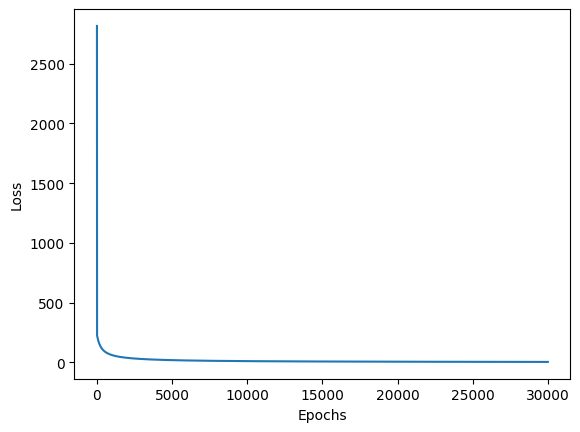

In [191]:
plt.plot(model.loss[1:])
plt.ylabel("Loss")
plt.xlabel("Epochs")

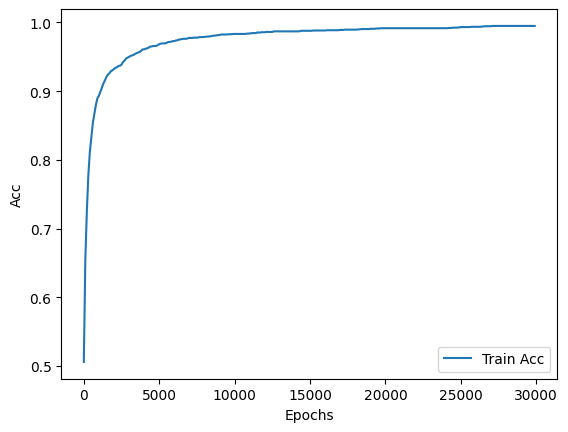

In [192]:


plt.plot(model.epochs, model.train_acc, label="Train Acc")
if model.val_acc != []: 
    plt.plot(model.epochs, model.val_acc, label="Val Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()

In [193]:
x_test_file = open("x_test.csv")
x_test = []
for idx, i in enumerate(x_test_file):
    if idx == 0:
        continue
    x = i.strip().split(",")
    x_test.append(x[1])
x_test = vectorizer.transform(x_test).toarray()

In [194]:
model = LG_Model(corpus_size)
model.load_model()

if  isinstance(x_val,np.ndarray)  and isinstance(y_val,np.ndarray):
        y_pred = model.predict(model.reshape_x(x_val))
        m = x_val.shape[0]
        acc = np.sum(y_pred == y_val)/m
        print("Testing Validation ACC: ", acc)


y_pred = model.predict(model.reshape_x(x_train))
m = x_train.shape[0]
acc = np.sum(y_pred == y_train)/m
print("Testing Train ACC: ", acc)


yprob_test = model.predict_prob(model.reshape_x(x_test))
yprob_test.shape

np.savetxt('yprob_test.txt',yprob_test, delimiter=',')
print(yprob_test)

Testing Train ACC:  0.995
[[8.32944480e-01]
 [1.97031007e-01]
 [1.07032560e-01]
 [1.00964194e-03]
 [9.62829773e-03]
 [1.38856346e-03]
 [2.08465068e-02]
 [6.75048762e-01]
 [1.13139534e-01]
 [6.56164622e-01]
 [5.78468450e-01]
 [4.20080009e-01]
 [4.73553332e-03]
 [1.00590057e-02]
 [5.16421159e-02]
 [7.30597401e-03]
 [4.49140312e-03]
 [1.34056040e-02]
 [1.06297233e-01]
 [9.55141593e-01]
 [7.33628430e-01]
 [1.92573996e-01]
 [4.98763435e-02]
 [8.84355920e-02]
 [6.13354208e-01]
 [1.90395693e-01]
 [3.99534486e-02]
 [8.65311776e-01]
 [4.85243222e-02]
 [3.35439146e-01]
 [4.85562482e-01]
 [6.59497298e-03]
 [2.15639741e-01]
 [3.09066280e-04]
 [5.56561626e-01]
 [8.35241860e-01]
 [2.92719293e-01]
 [1.02067401e-02]
 [2.92760776e-02]
 [5.97831900e-01]
 [1.77560679e-05]
 [6.29703945e-02]
 [2.04871692e-01]
 [5.28805331e-02]
 [3.67578333e-02]
 [2.52072318e-04]
 [8.95602858e-03]
 [3.32221646e-03]
 [7.34450725e-04]
 [4.85243222e-02]
 [9.79962620e-04]
 [1.80261112e-02]
 [9.99321449e-01]
 [4.42804711e-01]
 [

In [ ]:
#Test loading yprob_test.txt'
np.loadtxt('yprob_test.txt')